<div style="background-color:#000;"><img src="pqn.png"></img></div>

### Import necessary libraries for analysis

We will import the libraries needed to fetch financial data and perform time series analysis. The first import is `yfinance`, which allows us to download historical market data. The second import is `statsmodels.graphics.tsaplots`, which provides functions to plot autocorrelation functions.

In [1]:
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Fetch historical price data using Yahoo Finance

In this step, we will download historical monthly price data for the E-mini S&P 500 Futures. We will specify the ticker symbol to access the required financial data, the start date, and the interval for the data.

In [2]:
prices = yf.download("ES=F", start="2022-01-01", interval="1mo")

[*********************100%***********************]  1 of 1 completed


This code snippet uses the `yfinance` library to download historical price data for the E-mini S&P 500 Futures. We specify the ticker symbol "ES=F" to represent the futures contract. We set the start date to "2022-01-01" and choose a monthly interval for the data. The function returns a DataFrame containing the historical price data, which includes columns like Open, High, Low, Close prices, and Volume for each month.

### Calculate and clean percentage returns from price data

We will compute the percentage change in closing prices to determine the returns. We will also clean the data by removing any missing values that may arise from the calculation.

In [3]:
returns = prices.Close.pct_change().dropna()

We calculate the percentage change in the closing prices to determine the returns over each month. The `pct_change()` function computes the percentage change from the previous row, giving us the returns. Since the first observation will be NaN (as there is no previous data to compare), we use the `dropna()` function to remove any missing values. This results in a Series containing the cleaned percentage returns for the specified period.

### Visualize the autocorrelation and partial autocorrelation of returns

We will create plots to visualize the autocorrelation and partial autocorrelation of the returns. These plots help us understand the relationship between the returns at different time lags.

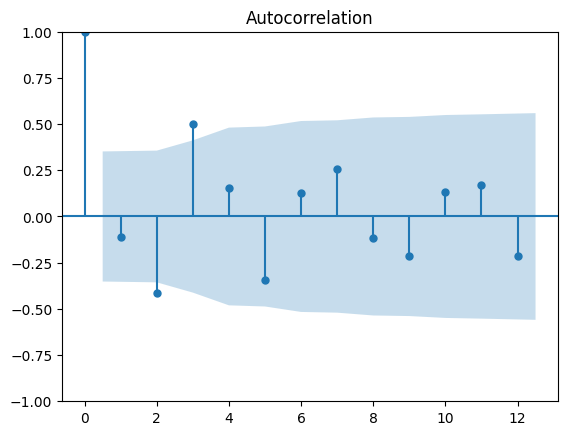

In [4]:
plot_acf(returns, lags=12);

The `plot_acf` function generates a plot of the autocorrelation function for the returns. The plot shows how the returns are correlated with their own past values at different lags, up to 12 months. Each vertical bar represents the correlation at a specific lag, and the shaded area indicates the confidence interval. If a bar extends beyond the shaded area, it suggests a statistically significant correlation at that lag. This helps in identifying any patterns or dependencies in the return series.

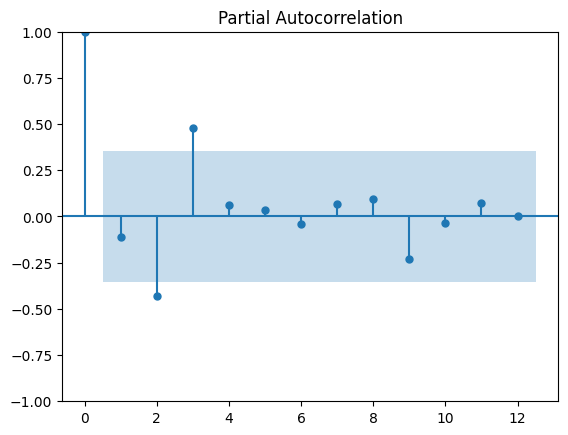

In [5]:
plot_pacf(returns, lags=12);

The `plot_pacf` function generates a plot of the partial autocorrelation function for the returns. This plot shows the direct correlation between the returns and their lagged values, excluding the influence of intermediate lags. Like the autocorrelation plot, the partial autocorrelation plot includes bars for each lag and shaded confidence intervals. By examining these plots, we can identify significant autoregressive patterns that might be useful for modeling and forecasting future returns.

### Your next steps

Try experimenting with different ticker symbols to analyze other financial instruments. Change the start date or interval to explore how different time frames affect the autocorrelation patterns. You can also extend the lag length to see if longer periods reveal more insights into the data's behavior.

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.